# Trabajo Final: Metodos Cuantitativos Aplicados a Estudios Urbanos

Profesor Ricardo Pasquini \
Universidad Torcuato Di Tella \
[rpasquini@utdt.edu](rpasquini@utdt.edu)

En este trabajo final vamos a analizar posibles determinantes del valor de los terrenos en CABA. En particular, vamos a analizar  cuestiones relacionadas a la regulación constructiva.

Los datos fueron compilados del sitio [Buenos Aires Data](https://data.buenosaires.gob.ar/). Si bien utilizarán esta base de datos para los fines del trabajo práctico, no deben utilizar estos datos investigación, ya que el procedimiento que se utilizó para combinar los datos debe revisarse y podría presentar errores o inconsistencias.  


**Importante:**

* El trabajo se realiza en grupos de hasta 2 personas.
* Las instrucciones para registrar su trabajo están en el sitio del campus UTDT de la materia. Deben buscar Trabajo Final 2023.
* La entrega se realiza exclusivamente mediante el Campus UTDT.
* Para responder a las preguntas agregue celdas de código y texto al notebook.


In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import statsmodels.api as sm

In [17]:
import statsmodels.api as sm

In [5]:
#Levantando los datos a un geodataframe
gdf=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/metodos_cuantitativos/raw/main/data/terrenos_2020_cregu_parcelas.zip")

# Un primer vistazo de los datos
Utilice el siguiente código para mapear sus datos (no es necesario hacer cambios en el código)

CRSError: The EPSG code is unknown. PROJ: proj_create_from_database: /home/rickhunter/miniconda3/envs/geotest/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.

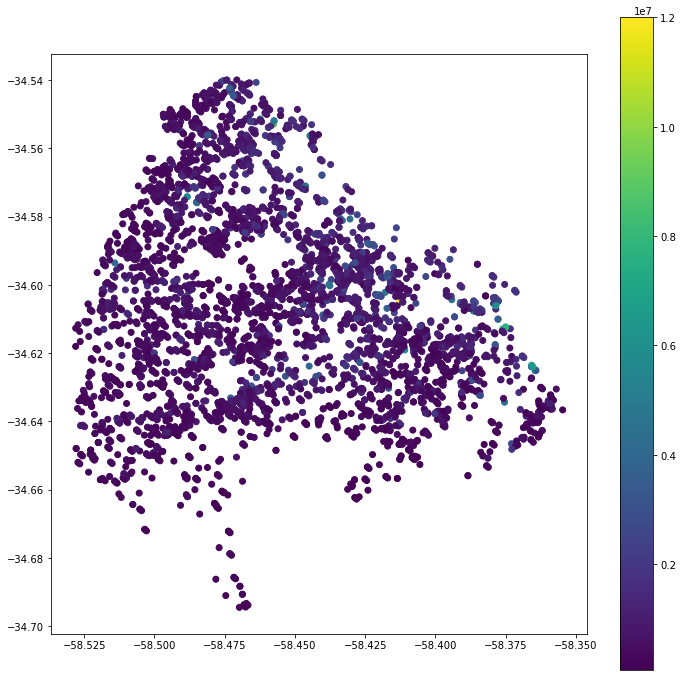

In [4]:
fig, ax = plt.subplots(figsize=(12, 12))
gdf.to_crs("EPSG:4326").plot(ax=ax,column='PRECIOUSD', legend=True)
#ax.set_xlim(-59.2, -58)
#ax.set_ylim(-35, -34.1)
cx.add_basemap(ax, crs=gdf.to_crs(epsg=4326).crs.to_string(), source=cx.providers.Stamen.TonerLite)
ax.axis('off')
#plt.title(ciudad)

In [5]:
gdf.columns

Index(['DIRECCION', 'SUPERFICIE', 'PRECIOUSD', 'PRECIOPESO', 'DOLARM2',
       'PESOSM2', 'COTIZACION', 'TRIMESTRE_', 'BARRIO', 'COMUNA_', 'lng',
       'lat', 'index_righ', 'gid', 'manzana', 'parcela', 'seccion', 'smp',
       'uni_edif_1', 'uni_edif_2', 'uni_edif_3', 'uni_edif_4', 'uso_1',
       'uso_2', 'uso_3', 'dist_1_grp', 'dist_1_esp', 'dist_2_grp',
       'dist_2_esp', 'dist_3_grp', 'dist_3_esp', 'dist_4_grp', 'dist_4_esp',
       'zona_1', 'zona_2', 'anac', 'ci_digital', 'rh', 'lep', 'ensanche',
       'apertura', 'catalogado', 'tipo_mza', 'rivolta', 'barrio_1', 'comuna',
       'inc_uva_19', 'alicuota', 'plano_l', 'plano_l_ob', 'dist_cpu_1',
       'dist_cpu_2', 'fot_em_1', 'fot_em_2', 'fot_pl_1', 'fot_pl_2',
       'fot_sl_1', 'fot_sl_2', 'cpu_base', 'ae_fot_bas', 'cpu_obs', 'sup_edif',
       'unidades', 'area', 'edificabil', 'diferencia', 'edificab_1',
       'diferenc_1', 'plusvalia', 'plusvaliap', 'plusvalia_', 'geometry'],
      dtype='object')

In [7]:
gdf

,DIRECCION,SUPERFICIE,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_,...,unidades,area,edificabil,diferencia,edificab_1,diferenc_1,plusvalia,plusvaliap,plusvalia_,geometry
0,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,CUARTO,ALMAGRO,5,...,11,659.6,727.95,-329.55,2275.620,-1777.620,0.000,0.000000,0.000000,POINT (104455.282 102452.878)
1,SANCHEZ DE BUSTAMANTE 200,348,590000,37612500,1695,108082,64,PRIMER,ALMAGRO,5,...,11,659.6,1200.60,-802.20,2275.620,-1777.620,0.000,0.000000,0.000000,POINT (104453.692 102452.943)
2,MEXICO 4000,320,300000,24000000,938,75000,80,CUARTO,ALMAGRO,5,...,0,426.3,512.00,-219.20,682.080,-316.080,0.000,0.000000,0.000000,POINT (103757.531 101006.535)
3,VENEZUELA 4067,250,305000,24400000,1220,97600,80,CUARTO,ALMAGRO,5,...,0,118.4,400.00,-283.20,189.440,-43.440,0.000,0.000000,0.000000,POINT (103765.317 101277.336)
4,LAVALLE 3300,150,320000,25600000,2133,170667,80,CUARTO,ALMAGRO,5,...,0,281.9,240.00,103.20,451.040,-22.040,23127.120,154.180800,154.180800,POINT (104651.516 103068.105)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,YERBAL 2700,563,1390000,88612500,2469,157393,64,TERCER,FLORES NORTE,7,...,0,988.5,1615.81,-1289.41,2836.995,-2428.995,0.000,0.000000,0.000000,POINT (99621.966 100060.088)
5006,PAEZ 2000,176,399000,25436250,2267,144524,64,TERCER,FLORES NORTE,7,...,2,228.6,484.00,-180.00,628.650,-248.650,0.000,0.000000,0.000000,POINT (100150.121 101237.566)
5007,"BONORINO, ESTEBAN, Cnel. 300",149,430000,27412500,2886,183976,64,PRIMER,FLORES NORTE,7,...,0,528.3,409.75,133.45,1452.825,-773.825,14893.020,99.953154,99.953154,POINT (100463.785 99758.316)
5008,"ALVAREZ, DONATO, Tte. Gral. 200",771,690000,43987500,895,57052,64,PRIMER,FLORES NORTE,7,...,33,659.7,2675.37,678.23,2289.159,1902.841,85456.980,110.839144,110.839144,POINT (100757.708 100642.521)


In [55]:
gdf=gdf[gdf['PRECIOUSD']<gdf['PRECIOUSD'].quantile(q=0.98)]

In [57]:
gdf.to_file('terrenos_2020_cregu_parcelas.shp') 

/home/rickhunter/miniconda3/envs/geotest/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


ValueError: Invalid field type <class 'bytes'>

<AxesSubplot:>

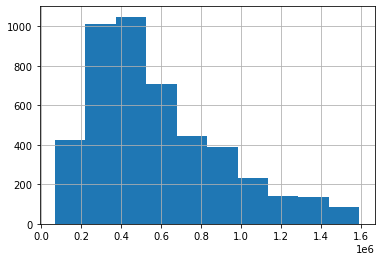

In [56]:
gdf['PRECIOUSD'].hist()

### Descripcion de campos
| campo      | tipo    | descripcion                                                                                                                                                                                             |
| ---------- | ------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| SUPERFICIE       | int  | Superficie en m2     
| PRECIOUSD | int  | Precio terreno en USD 
| COTIZACION |	int | Cotizacion del USD en pesos
| TRIMESTRE | string | Trimestre
| BARRIO	 | string | Barrio
| COMUNA | int | Nro de Comuna
| smp1       | string  | Corresponde al número de identificación de la Sección-Manzana-Parcela                                                                                                                                   |
| sm         | string  | Corresponde al número de identificación de la Sección-Manzana              |
| uni_edif_1 | number  | Unidad de edificabilidad 1: define la altura máxima aplicable a cada Unidad de la Ciudad de Buenos Aires
| plusvalia | number  | Estimación de la plusvalia que debería pagar el desarrollador si aprovechase la máxima capacidad constructiva

# Pregunta 1

Suponga que el valor al que se oferta un terreno puede modelarse de la siguiente manera:

$$PrecioUSD_i=\beta_0+\beta_1\textit{Superficie}_i+\epsilon_i$$

Le llamaremos a este modelo el MODELO 1.  


1. Estime el modelo.

2. Interprete el valor de $\hat{\beta_0}$ y  $\hat{\beta_1}$.

3. Proponga un test de hipótesis para comprobar si la superficie tiene un efecto en el valor de oferta de un terreno.

4. Evalue la bondad de ajuste del modelo. Proponga una medida e interprete los resultados de la estimación del modelo de regresión. 


In [23]:
gdf['constant']=1

In [25]:
modelo1=sm.OLS(gdf['PRECIOUSD'], gdf[['constant','SUPERFICIE']], missing=True, hasconst=True)
resultados1=modelo1.fit()
print(resultados1.summary())

                            OLS Regression Results                            
Dep. Variable:              PRECIOUSD   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     1019.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          9.39e-203
Time:                        22:00:43   Log-Likelihood:                -67144.
No. Observations:                4748   AIC:                         1.343e+05
Df Residuals:                    4746   BIC:                         1.343e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    3.317e+05   9898.495     33.505      0.0

# Pregunta 2

Suponga el siguiente modelo alternativo para el valor de los terrenos (MODELO 2):

$$PrecioUSD_i=\beta_0+\beta_1\textit{Superficie}_i+\beta_2\textit{uni_edif_1}_i+\epsilon_i$$

Donde *uni_edif_1* es la altura maxima que puede construirse en el terreno *i*.

1. Estime el modelo. Interprete los coeficientes estimados.

2. Interprete el valor de  $\hat{\beta_0}$, $\hat{\beta_1}$ y de  $\hat{\beta_2}$. En particular, discuta si la interpretación de $\hat{\beta_1}$ es similar (o no) a la realizada en el caso del MODELO 1. 

3. Identifique en qué medida el MODELO 2 provee una mejor explicación a los precios de los terrenos.

In [26]:
modelo2=sm.OLS(gdf['PRECIOUSD'], gdf[['constant','SUPERFICIE','uni_edif_1']], missing=True, hasconst=True)
resultados2=modelo2.fit()
print(resultados2.summary())

                            OLS Regression Results                            
Dep. Variable:              PRECIOUSD   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     736.5
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          2.81e-279
Time:                        22:04:22   Log-Likelihood:                -66964.
No. Observations:                4748   AIC:                         1.339e+05
Df Residuals:                    4745   BIC:                         1.340e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    1.927e+05   1.19e+04     16.142      0.0

# Pregunta 3 
Considere el siguiente modelo (MODELO 3):

$$PrecioUSD_i=\beta_0+\beta_1\textit{0.8*Superficie*uni_edif_1}_i+\epsilon_i$$

Donde la medida $\textit{0.8*Superficie*uni_edif_1}$ es una aproximación a la superficie edificable en el terreno. 

1. Proponga una método para estimar $\beta_1$
2. Provea una interpretación para  $\hat{\beta_1}$.
3. Identifique en qué medida el MODELO 3 provee un mejor ajuste de los datos que el MODELO 2.

In [29]:
gdf['edificabilidad']=0.8*gdf['SUPERFICIE']*gdf['uni_edif_1']
modelo3=sm.OLS(gdf['PRECIOUSD'], gdf[['constant','edificabilidad']], missing=True, hasconst=True)
resultados3=modelo3.fit()
print(resultados3.summary())

                            OLS Regression Results                            
Dep. Variable:              PRECIOUSD   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     995.7
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.46e-198
Time:                        22:06:39   Log-Likelihood:                -67153.
No. Observations:                4748   AIC:                         1.343e+05
Df Residuals:                    4746   BIC:                         1.343e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
constant        4.492e+05   6980.872     64.

# Pregunta 4

1.  Analice graficamente el cumplimiento del supuesto normalidad de los errores utilizando los resultados de la estimación de  regresión. 
  *Nota:* Puede realizar este análisis en base a cualquiera de los 3 MODELOS estimados. Elija el que prefiera 
  
 
2. ¿Pueden considerarse válido un test de hipótesis como el realizado en el punto 1.3 en este caso particular? ¿Por qué sí o por qué no?



In [45]:
predicciones=resultados3.predict()
gdf['residuos']=gdf['PRECIOUSD']-predicciones

<AxesSubplot:>

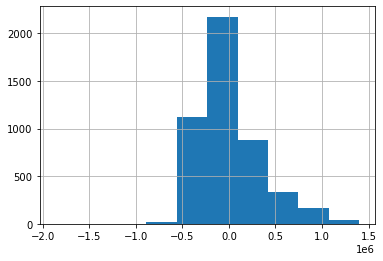

In [47]:
gdf['residuos'].hist()

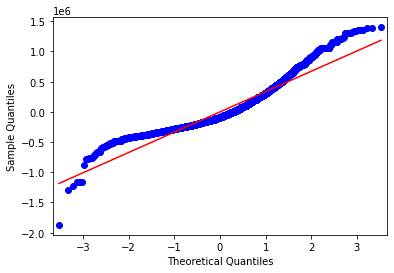

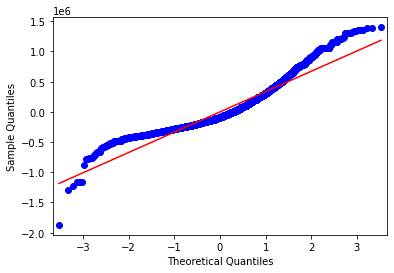

In [54]:
import statsmodels.graphics.gofplots as smg
smg.qqplot(gdf['residuos'], line='s')

# Pregunta 5
1. Usando los datos disponibles, proponga un modelo para analizar el efecto de la incorporación de la localización como variable explicativa del precio de los terrenos. Ayuda: Puede utilizar la comuna o el barrio. ¿En qué medida  la localización es relevante para explicar los precios de los terrenos?
2. Proponga un test para identificar si los terrenos ubicados en la Comuna 5  (Almagro, Boedo) presentan menor valor que los de la Comuna 1 (Retiro, San Nicolás). Explique los resultados.

In [40]:
import statsmodels.formula.api as smf
# Define the formula using R-style syntax
formula = "PRECIOUSD ~SUPERFICIE + uni_edif_1 + C(COMUNA_)"

# Create the OLS model using the formula
modelo4 = smf.ols(formula, data=gdf, missing="drop")
resultados4=modelo4.fit()
print(resultados4.summary())

                            OLS Regression Results                            
Dep. Variable:              PRECIOUSD   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     231.8
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:20:00   Log-Likelihood:                -66232.
No. Observations:                4748   AIC:                         1.325e+05
Df Residuals:                    4731   BIC:                         1.326e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.656e+05   2.49e+04  

# Pregunta 6

1. La variable 'plusvalia' presenta una estimación de lo que el desarrollador de un terreno debería pagar al Gobierno si va a aprovechar la constructividad adicional que le otorgó el nuevo código de edificación. Suponga que su hipótesis de investigación es que la captación de plusvalía por parte del Gobierno reduce el valor de oferta de un terreno, ya que los desarrolladores querrían pagar menos por un terreno por el cuál deberán pagar más plusvalía.  Proponga y estime un modelo para identificar la hipótesis en cuestión. Explique sus resultados

 *Nota:* A los fines de esta pregunta puede trabajar con su modelo de preferencia (MODELO 1, MODELO 2, o MODELO 3) y modificarlo apropiadamente. 

In [43]:
formula = "PRECIOUSD ~SUPERFICIE + uni_edif_1 + C(COMUNA_)+ plusvalia"

# Create the OLS model using the formula
modelo4 = smf.ols(formula, data=gdf, missing="drop")
resultados4=modelo4.fit()
print(resultados4.summary())

                            OLS Regression Results                            
Dep. Variable:              PRECIOUSD   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:31:16   Log-Likelihood:                -66228.
No. Observations:                4748   AIC:                         1.325e+05
Df Residuals:                    4730   BIC:                         1.326e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.565e+05   2.51e+04  